# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [185]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [186]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: GRADES_4_G

How many years of data are logged in our dataset? 

In [187]:
print(df['YEAR'].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [188]:
michigan = df.iloc[23,21]
ohio = df.iloc[36,21]

if michigan > ohio:
    print("Michigan")
else:
    print("Ohio")


Michigan


Find the average for your outcome score across all states in 2019

In [189]:
df.dropna(subset=['GRADES_4_G'], inplace=True)
df["GRADES_4_G"].mean()

69166.50796568628

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [190]:
print(df.groupby('STATE')['GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G'].max())

                      GRADES_PK_G  GRADES_KG_G  GRADES_4_G  GRADES_8_G  \
STATE                                                                    
ALABAMA                   15520.0      60949.0     60012.0     60004.0   
ALASKA                     3586.0      10632.0     10926.0     11140.0   
ARIZONA                   16748.0      87229.0     89184.0     86312.0   
ARKANSAS                  16827.0      40463.0     38800.0     37369.0   
CALIFORNIA               125099.0     535379.0    493415.0    500143.0   
COLORADO                  33048.0      67225.0     69784.0     67854.0   
CONNECTICUT               18579.0      44148.0     45307.0     45854.0   
DELAWARE                   1802.0      10488.0     10838.0     10494.0   
DISTRICT_OF_COLUMBIA      12727.0       7736.0      6339.0      6085.0   
FLORIDA                   61241.0     210489.0    220504.0    211073.0   
GEORGIA                   47726.0     136837.0    138249.0    133128.0   
HAWAII                     1648.0     

/var/folders/2s/2bq9qxms6vl9m9slzp9xc4cmb49fx6/T/ipykernel_96050/2568578148.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('STATE')['GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G'].max())


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [191]:
df['INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE'] = (df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_REVENUE'])*100
df.head() 

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,55.310437
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,47.481543
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,44.072228
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,56.328627
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,54.679773


Feature engineering justification: To find out how much each state is willing to dedicate of their total revenue to educational purposes. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Grade 4 Grades')

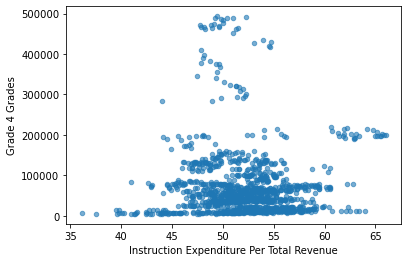

In [192]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE',y='GRADES_4_G',alpha=0.6)
plt.xlabel('Instruction Expenditure Per Total Revenue')
plt.ylabel('Grade 4 Grades')

Instruction Expenditure Per Total Revenue vs. Grade 4 Grades

The initial guess that the ratio of instruction expenditure and total revenue would indicate grade 4 grades was wrong as we can see from the scatter plot above. 

**Visualization 2**

Text(0, 0.5, 'The Grades of All Grades')

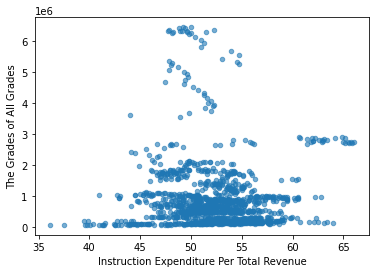

In [193]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE',y='GRADES_ALL_G',alpha=0.6)
plt.xlabel('Instruction Expenditure Per Total Revenue')
plt.ylabel('The Grades of All Grades')

Instruction Expenditure Per Total Revnue vs. The Grades of All Grades

This scatter plot confirms that instruction expenditure as a percentage of total revenue is not indicative of grade perfomances. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X = df[["INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE"]].dropna()
y = df.loc[X.index]["GRADES_4_G"]

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [197]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [198]:
# create your model here
model = LinearRegression()

In [199]:
model.fit(X_train, y_train)

LinearRegression()

In [200]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [208]:
np.mean(model.predict(X_test)-y_test)

28995.868870401813

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

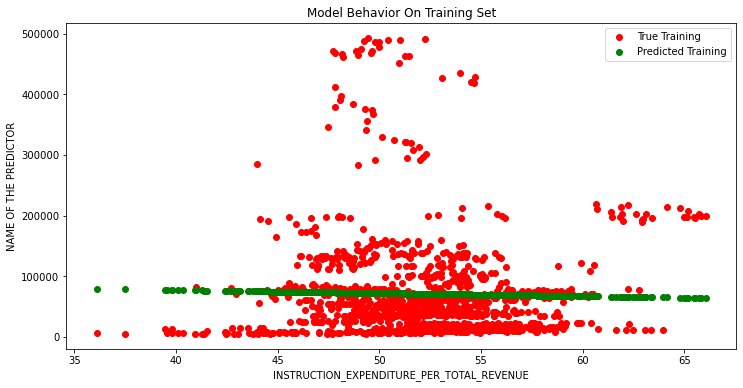

In [202]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

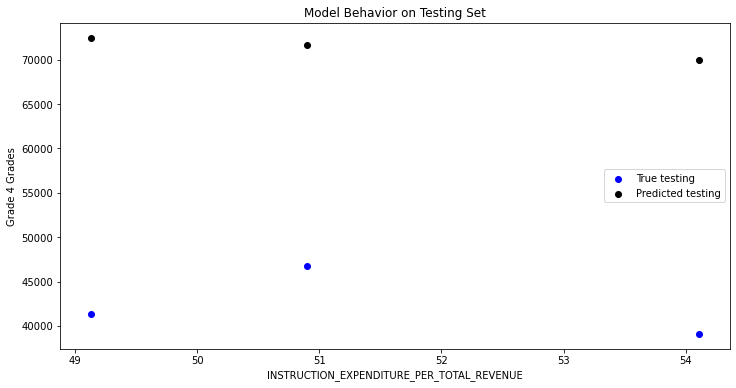

In [203]:
col_name = "INSTRUCTION_EXPENDITURE_PER_TOTAL_REVENUE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Grades')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I attempted to create a predictor based on the instruction expenditure as a percentage of the total revenue of each state to determine wether that would have any relevance in predicting the grades of fourth grades. The results demonstrate that there is no correlation between this metric and such grades. Therefore, the perfomance of this model is very poor and is not accurate. 